# **Visualisations**

## Objectives
In this notebook, I will explore and communicate key trends in global video game sales to validate my hypotheses about what drives sales performance.  
I will begin with an overview of **global sales trends**, then create targeted visualisations to test each hypothesis — such as the impact of reviews, regional platform strength, and the effect of multi-platform and first-party releases.

---

## Inputs
I will use the **processed datasets** created during ETL and feature engineering:

- `video_game_sales_cleaned.csv` — base cleaned dataset with essential sales and metadata.
- `video_game_sales_critic_review.csv` — games with valid critic reviews.
- `video_game_sales_user_review.csv` — games with valid user reviews.
- `video_game_sales_merged.csv` — aggregated game-level dataset (platforms merged) with engineered `is_multiplatform` column.
- `video_game_sales_first_party.csv` — dataset with engineered `is_first_party` column.

## Outputs
- Visualisations that support each hypothesis:
  - **Global sales trends** over time.
  - Impact of **critic reviews** on sales.
  - Impact of **user reviews** on sales.
  - **Platform strength by region** (Nintendo, Sony, Microsoft, Other).
  - **Multi-platform vs single-platform** sales comparison.
  - **First-party vs third-party** sales comparison.
- Charts and summaries for the final Tableau dashboard.

## Approach
Each visualisation ties directly to one of my hypotheses and Kanban board user stories.  
I will start with a **Global Sales Trend** plot to establish market context, then move into deeper hypothesis testing using the processed datasets.

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/stephenbeese/GitHub/Video-Game-Sales-Analysis/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/stephenbeese/GitHub/Video-Game-Sales-Analysis'

Set up the data directories

In [4]:
# Set the file path for the raw data
raw_data_dir = os.path.join(current_dir, 'data/raw')

# Set the file path for the processed data
processed_data_dir = os.path.join(current_dir, 'data/processed')

# Print file paths
print("Raw data directory:", raw_data_dir)
print("Processed data directory:", processed_data_dir)

Raw data directory: /Users/stephenbeese/GitHub/Video-Game-Sales-Analysis/data/raw
Processed data directory: /Users/stephenbeese/GitHub/Video-Game-Sales-Analysis/data/processed


# Imports

Import the necessary packages to perform the visualisation process.

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import linregress, ttest_ind, mannwhitneyu

from utils.validation import run_anova_by_region, run_tukey_by_region

# Load the csv files into dataframes

In [6]:
# Load the processed datasets
df_master = pd.read_csv(os.path.join(processed_data_dir, 'video_game_sales_cleaned.csv'))
df_merged = pd.read_csv(os.path.join(processed_data_dir, 'video_game_sales_merged.csv'))
df_first_party = pd.read_csv(os.path.join(processed_data_dir, 'video_game_sales_first_party.csv'))
df_critic_reviews = pd.read_csv(os.path.join(processed_data_dir, 'video_game_sales_critic_review.csv'))
df_user_reviews = pd.read_csv(os.path.join(processed_data_dir, 'video_game_sales_user_review.csv'))

### You can view these dataframes [here](display_data.ipynb)

---

# Global Overview

### Global Sales Trends Over Time
- Plot total `Global_Sales` by `Year_of_Release`.
- Highlight peaks (e.g. Wii/DS era, PlayStation boom).

In [7]:
# Aggregate global sales by year
global_sales_by_year = (
    df_master.groupby('Year_of_Release')['Global_Sales']
    .sum()
    .reset_index()
    .sort_values(by='Year_of_Release')
)

# filter out invalid years
global_sales_by_year = global_sales_by_year[global_sales_by_year['Year_of_Release'] > 0]

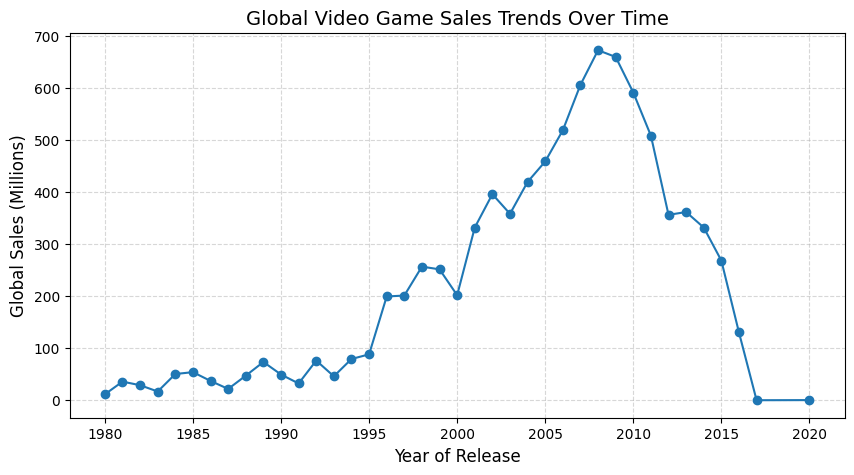

In [8]:
# Plot global sales over time
plt.figure(figsize=(10, 5))
plt.plot(global_sales_by_year["Year_of_Release"], global_sales_by_year["Global_Sales"], marker="o")
plt.title("Global Video Game Sales Trends Over Time", fontsize=14)
plt.xlabel("Year of Release", fontsize=12)
plt.ylabel("Global Sales (Millions)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

# Save the plot
plt.savefig(os.path.join(current_dir, 'images/visualisations/global_sales_trends.png'))

# Show the plot
plt.show()

### Insights from Global Sales Trends

* **Steady Growth (1980s–1990s)**
  * Sales gradually rose as consoles like NES, SNES, and PlayStation became mainstream.

* **Peak Era (2000–2009)**
  - Sharp growth leading to a peak around **2008–2009**, driven by the Wii/DS boom and strong PS3/Xbox 360 releases.

* **Decline After 2009**
  - Sales drop steeply — likely due to digital distribution, mobile gaming, and fewer physical releases.

* **Recent Low Volumes (2015+)**
  - Physical sales remain low as the market shifts to digital downloads, subscriptions, and live-service games.

---

### Average Global Sales Over Time
- Plot average [(mean)](../README.md#core-statistical-concepts) `Global_Sales` by `Year_of_Release`.
- Highlight key shifts in the typical game’s performance

This is useful to understand how the sales per game changed over time — this avoids the distortion caused by years with unusually high numbers of releases and shows the market’s true health.

In [9]:
# Calculate average global sales per game per year
avg_sales_by_year = (
    df_master.groupby('Year_of_Release')['Global_Sales']
    .mean()
    .reset_index()
    .sort_values('Year_of_Release')
)

# Filter out invalid years
avg_sales_by_year = avg_sales_by_year[avg_sales_by_year['Year_of_Release'] > 0]

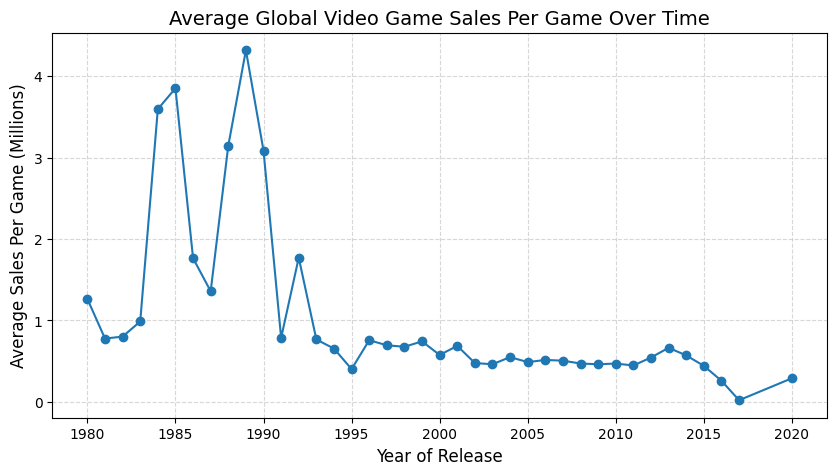

In [10]:
# Plot
plt.figure(figsize=(10,5))
plt.plot(avg_sales_by_year['Year_of_Release'], avg_sales_by_year['Global_Sales'], marker='o')
plt.title('Average Global Video Game Sales Per Game Over Time', fontsize=14)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Average Sales Per Game (Millions)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Save the plot
plt.savefig(os.path.join(current_dir, 'images/visualisations/average_global_sales_trends.png'))

# Show the plot
plt.show()


### Insights from Average Sales per Game by Year

* **Early spikes are unstable** — Pre-1995 values show sharp peaks and dips likely due to very small sample sizes (few games released per year, so one hit skews the average).
* **Long-term decline** — After the mid-90s, average sales per game dropped and stabilised around ~0.5–1M per title, showing a more saturated market and increased competition.
* **Hit-driven economy** — The steady low average despite total sales growth suggests the market relied on a few mega-hits (e.g., Wii Sports, GTA) while most games sold modestly.
* **Important check** — Outliers and low release counts in early years can distort averages

This plot complements total sales trends. It helps to avoid misleading conclusions (e.g., “sales peaked in 2008”) by showing that while total revenue was high, the *average game* didn’t necessarily sell better.

---
# **Hypothesis Testing**
---

## Hypothesis 1 - Critic Reviews Drive Sales
- **Data:** `video_game_sales_critic_review.csv`
- **Visual:** Scatter plot of `Critic_Score` vs `Global_Sales`  
  - Regression line  
  - Bubble size = `Critic_Count`
- **Validation:** Look for positive correlation & p-value < 0.05.

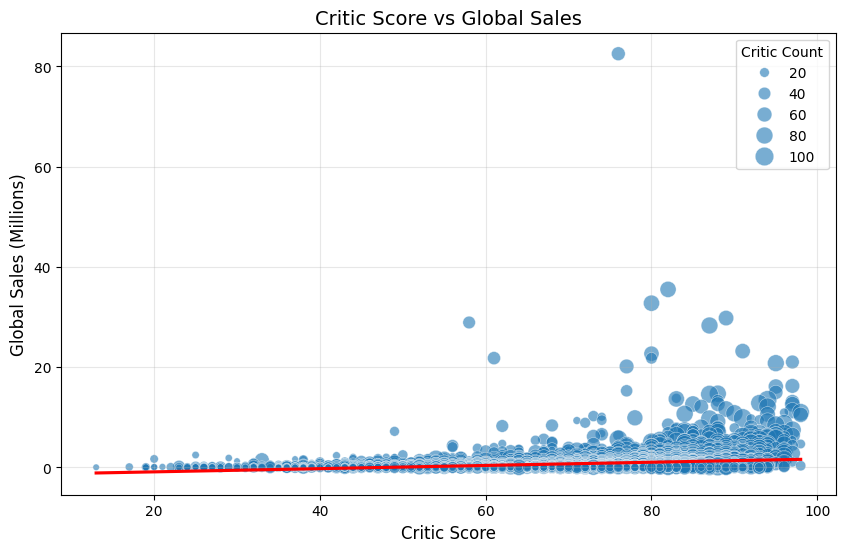

In [11]:
# Scatter plot with regression line: Critic Score vs Global Sales

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_critic_reviews,
    x="Critic_Score",
    y="Global_Sales",
    size="Critic_Count",
    sizes=(20, 200),
    alpha=0.6
)

# Add regression line
sns.regplot(
    data=df_critic_reviews,
    x="Critic_Score",
    y="Global_Sales",
    scatter=False,
    color="red",
    line_kws={'label':"Regression Line"}
)

# Customise the plot
plt.title("Critic Score vs Global Sales", fontsize=14)
plt.xlabel("Critic Score", fontsize=12)
plt.ylabel("Global Sales (Millions)", fontsize=12)
plt.legend(title="Critic Count")
plt.grid(alpha=0.3)

# Save the plot
plt.savefig(os.path.join(current_dir, 'images/visualisations/critic_score_vs_global_sales.png'))

# Show the plot
plt.show()

In [12]:
# Calculate correlation and regression statistics
slope, intercept, r_value, p_value, std_err = linregress(
    df_critic_reviews["Critic_Score"], df_critic_reviews["Global_Sales"]
)

# Print the statistics
print(f"Correlation (r): {r_value:.3f}")
print(f"P-value: {p_value:.5f}")
print(f"Slope: {slope:.3f} (Global sales change per critic point)")


Correlation (r): 0.245
P-value: 0.00000
Slope: 0.032 (Global sales change per critic point)


### Insights — Critic Scores vs Global Sales

The scatter plot shows a **positive but modest correlation** between critic scores and global sales (r = 0.245, p < 0.001). This indicates that games with higher critic scores **tend to sell more**, but the relationship is not very strong.

* **Statistical significance:** The p-value is effectively zero, so the relationship is highly significant.
* **Practical effect:** The slope suggests that for each additional point in critic score, global sales increase on average by ~0.03 million units. While small per point, the effect could accumulate (e.g., a 20-point score difference ≈ 0.6M extra sales).
* **Outliers:** Some blockbuster games with extreme sales overshadow most data points; filtering or using log scale helps to reveal the overall trend.
* **Critic count:** Larger bubbles (higher `Critic_Count`) cluster among higher-scoring and better-selling games, suggesting that games with more reviews are often also more commercially successful.

**Interpretation:**
Critic scores do appear to matter, but they explain only a small portion of sales variation. Other factors (franchise, marketing, platform, genre) likely have a bigger influence on commercial success.

---


Due to the fact that the above graph contains some obvious outliers.

I am going to filter these out to games selling less that 20M copies to create a more typical visualisation.

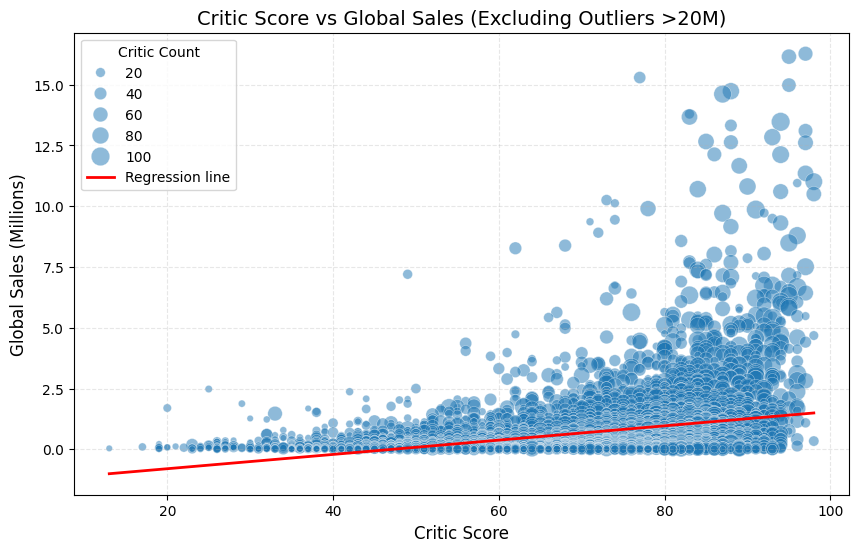

In [13]:
# Filter out extreme outliers for readability (games selling >20M)
filtered_critic = df_critic_reviews[df_critic_reviews["Global_Sales"] <= 20]

plt.figure(figsize=(10, 6))

# Bubble scatter plot using Seaborn
sns.scatterplot(
    data=filtered_critic,
    x="Critic_Score",
    y="Global_Sales",
    size="Critic_Count",
    sizes=(20, 200),      # bubble size range
    alpha=0.5,
    legend="brief"
)

# Regression line (linear fit)
slope, intercept, r_value, p_value, std_err = linregress(
    filtered_critic["Critic_Score"],
    filtered_critic["Global_Sales"]
)

# Add regression line
sns.lineplot(
    x=filtered_critic["Critic_Score"],
    y=intercept + slope*filtered_critic["Critic_Score"],
    color="red",
    linewidth=2,
    label="Regression line"
)

# Plot formatting
plt.xlabel("Critic Score", fontsize=12)
plt.ylabel("Global Sales (Millions)", fontsize=12)
plt.title("Critic Score vs Global Sales (Excluding Outliers >20M)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend(title="Critic Count")

# Save the plot
plt.savefig(os.path.join(current_dir, 'images/visualisations/critic_score_vs_global_sales_filtered.png'))

# Show the plot
plt.show()



In [14]:
# Display correlation stats
print(f"Correlation (r): {r_value:.3f}")
print(f"P-value: {p_value:.5f}")
print(f"Slope: {slope:.3f} (Global sales change per critic point)")

Correlation (r): 0.331
P-value: 0.00000
Slope: 0.029 (Global sales change per critic point)


### Insights — Critic Reviews Drive Sales (Filtered - <20M Global Sales)

The scatter plot shows a clearer positive correlation between critic scores and global sales once extreme outliers are removed (r = 0.331, p < 0.001). This suggests that critic reviews have a moderate influence on sales.

* **Statistical significance:** The p-value is effectively zero, confirming the relationship is highly significant.
* **Practical effect:** The slope indicates each additional critic point adds about **0.03M sales** on average. A 20-point difference could equate to ~0.6M extra sales.
* **Outliers:** Removing blockbuster hits (>20M sales) improves readability and highlights the general trend.
* **Critic count:** Larger bubbles (higher Critic_Count) still cluster toward higher scores and better sales, showing that widely reviewed, well-rated games tend to sell more.

**Interpretation:** Critic scores appear to have a stronger and clearer link to sales after filtering extreme hits. However, the relationship is still moderate — other commercial drivers such as brand recognition, marketing, and platform likely play major roles.

---

## Hypothesis 1 - Overall Conclusions

### **Higher critic review scores positively influence sales.**

### Statistical Validation

* **Correlation (all data):** r = **0.245** (positive but modest)
* **Correlation (filtered <20M):** r = **0.331** (stronger once extreme hits removed)
* **P-value:** <0.001 in both cases → **highly significant relationship**
* **Slope:** ≈ **0.03M extra sales per 1-point critic score increase**
  → 20-point difference ≈ +0.6M global sales

### Interpretation

* The hypothesis is **statistically supported** — critic scores do have a positive and significant relationship with global sales.
* **However**, the effect size is modest, meaning critic reviews influence sales but don’t fully explain commercial success. Other factors like brand/franchise power, marketing budgets, and platform impact likely play a larger role.
* Filtering extreme outliers made the trend clearer and improved correlation, indicating blockbuster games can distort the overall picture.

**Validation Decision:**
* Hypothesis **ACCEPTED** — critic reviews significantly influence sales, but the impact is moderate rather than dominant.

---

## Hypothesis 2 — User Reviews Drive Sales

* **Data:** `video_game_sales_user_review.csv`
* **Visual:** Scatter plot of `User_Score` vs `Global_Sales`

  * Regression line
  * Bubble size = `User_Count`
* **Validation:** Look for a positive correlation (p-value < 0.05) between user score and global sales.

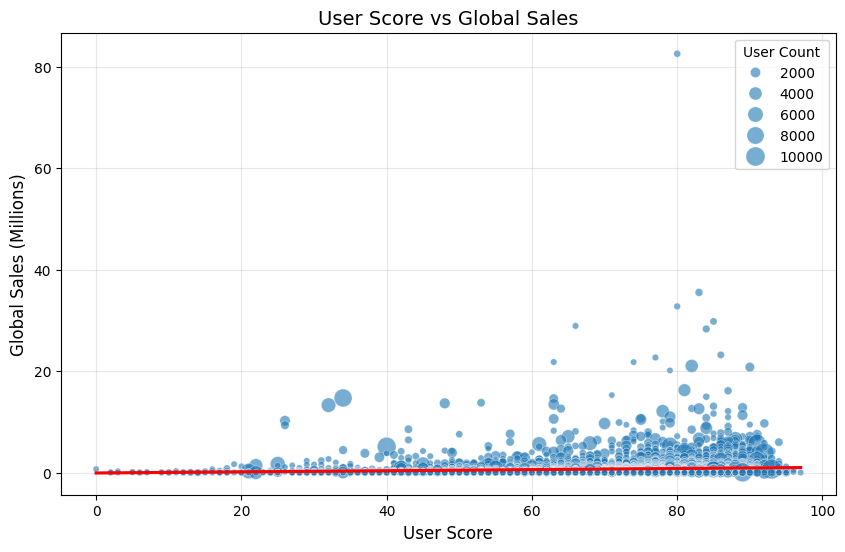

In [15]:
# Scatter plot with regression line: User Score vs Global Sales

user_score = df_user_reviews["User_Score"] * 10  # Scale to 0-100 for consistency

plt.figure(figsize=(10,6))
# Bubble scatter plot using Seaborn
sns.scatterplot(
    data=df_user_reviews,
    x=user_score,
    y="Global_Sales",
    size="User_Count",
    sizes=(20, 200),
    alpha=0.6,
)

# Add regression line
sns.regplot(
    data=df_user_reviews,
    x=user_score,
    y="Global_Sales",
    scatter=False,
    color="red",
    line_kws={'label':"Regression Line"}
)

# Customise the plot
plt.title("User Score vs Global Sales", fontsize=14)
plt.xlabel("User Score", fontsize=12)
plt.ylabel("Global Sales (Millions)", fontsize=12)
plt.legend(title="User Count")
plt.grid(alpha=0.3)

# Save the plot
plt.savefig(os.path.join(current_dir, 'images/visualisations/user_score_vs_global_sales.png'))

# Show the plot
plt.show()

In [16]:
# Calculate correlation and regression statistics
slope, intercept, r_value, p_value, std_err = linregress(
    df_user_reviews["User_Score"], df_user_reviews["Global_Sales"]
)

# Print the statistics
print(f"Correlation (r): {r_value:.3f}")
print(f"P-value: {p_value:.5f}")
print(f"Slope: {slope:.3f} (Global sales change per user point)")


Correlation (r): 0.088
P-value: 0.00000
Slope: 0.110 (Global sales change per user point)


### Insights — User Scores vs Global Sales

The scatter plot shows a **weak positive correlation** between user scores and global sales (r = 0.088, p < 0.001). This suggests that games with higher user ratings **tend to sell slightly more**, but the relationship is very weak overall.

* **Statistical significance:** The p-value is zero, indicating the relationship is statistically significant but not practically strong.
* **Practical effect:** The slope (0.11) implies that for each additional point in user score (0–100 scale), sales increase on average by about **0.11 million units**, though the overall effect remains minor.
* **Outliers:** A few blockbuster games dominate global sales, overshadowing smaller titles; these outliers may inflate the overall trend slightly.
* **User count:** Larger bubbles (higher `User_Count`) tend to appear among games with higher scores and better sales, indicating that popular, well-rated games attract more user engagement.

**Interpretation:**
While user reviews show a statistically valid connection with sales, the correlation is very small. This implies that **user sentiment alone does not drive sales** — instead, broader factors such as marketing, brand loyalty, and platform availability likely have a much greater influence on commercial success.

---

Similarly to the previous hypothesis the above graph contains some obvious outliers.

I am going to filter these out to games selling less that 20M copies to create a more typical visualisation.

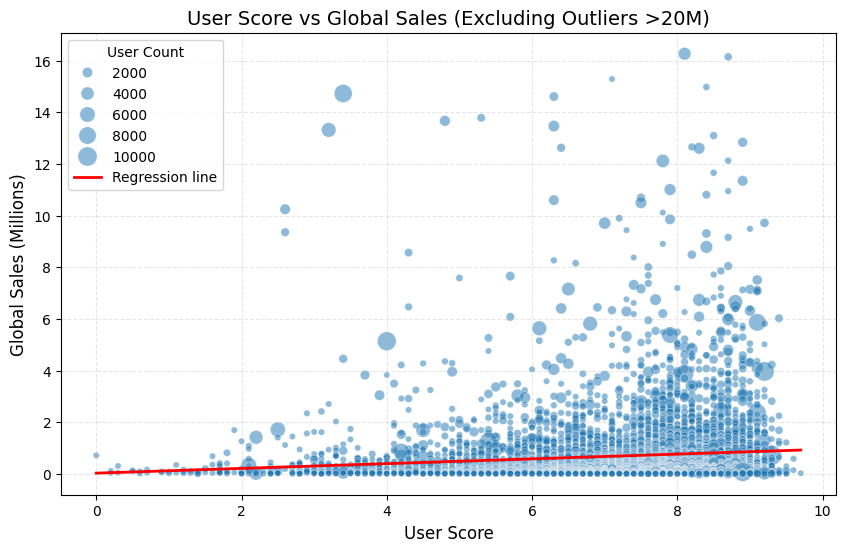

In [17]:
# Filter out extreme outliers for readability (games selling >20M)
filtered_user = df_user_reviews[df_user_reviews["Global_Sales"] <= 20]

plt.figure(figsize=(10, 6))

# Bubble scatter plot using Seaborn
sns.scatterplot(
    data=filtered_user,
    x="User_Score",
    y="Global_Sales",
    size="User_Count",
    sizes=(20, 200),      # bubble size range
    alpha=0.5,
    legend="brief"
)

# Regression line (linear fit)
slope, intercept, r_value, p_value, std_err = linregress(
    filtered_user["User_Score"],
    filtered_user["Global_Sales"]
)

# Add regression line
sns.lineplot(
    x=filtered_user["User_Score"],
    y=intercept + slope*filtered_user["User_Score"],
    color="red",
    linewidth=2,
    label="Regression line"
)

# Plot formatting
plt.xlabel("User Score", fontsize=12)
plt.ylabel("Global Sales (Millions)", fontsize=12)
plt.title("User Score vs Global Sales (Excluding Outliers >20M)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend(title="User Count")

# Save the plot
plt.savefig(os.path.join(current_dir, 'images/visualisations/user_score_vs_global_sales_filtered.png'))

# Show the plot
plt.show()

In [18]:
# Display correlation stats
print(f"Correlation (r): {r_value:.3f}")
print(f"P-value: {p_value:.5f}")
print(f"Slope: {slope:.3f} (Global sales change per user point)")

Correlation (r): 0.109
P-value: 0.00000
Slope: 0.092 (Global sales change per user point)


### Insights — User Scores vs Global Sales (Filtered, Excluding Outliers >20M)

The scatter plot shows a **slightly stronger but still weak positive correlation** between user scores and global sales after filtering out extreme outliers (r = 0.109, p < 0.001). This suggests that games with higher user ratings **tend to sell marginally more**, but the relationship remains limited.

* **Statistical significance:** The p-value is effectively zero, confirming that the relationship is statistically significant.
* **Practical effect:** The slope (0.092) indicates that each additional point in user score (on a 0–10 scale) corresponds to an average increase of about **0.09 million sales**. Even though the effect is small, it implies some alignment between positive user feedback and sales.
* **Outliers:** By removing blockbuster games (>20M sales), the trend becomes clearer, showing that the relationship holds even among typical games rather than being driven by a few massive hits.
* **User count:** Larger bubbles (higher `User_Count`) continue to cluster toward higher scores and sales, reinforcing that games with more active player bases or visibility often achieve greater commercial success.

**Interpretation:**
While user ratings do show a statistically significant connection with sales, the correlation is still weak. This indicates that **user sentiment contributes modestly to sales outcomes**, but factors such as marketing budgets, brand loyalty, and platform presence likely play a much more dominant role in driving commercial performance.

---

## Hypothesis 2 - Overall Conclusions

**Higher user review scores have a weak but statistically significant relationship with sales.**

### Statistical Validation

* **Correlation (all data):** r = 0.088 (very weak positive relationship)
* **Correlation (filtered <20M):** r = 0.109 (slightly stronger after removing outliers)
* **P-value:** <0.001 in both cases → **highly significant relationship**
* **Slope:** ≈ 0.09–0.11M extra sales per 1-point user score increase → 10-point difference ≈ +0.9–1.1M global sales

### Interpretation

* The hypothesis is **statistically supported** — user scores do have a positive and significant relationship with global sales.
* **However**, the correlation is weak, meaning user sentiment influences sales only slightly.
* **Filtering out extreme outliers** (blockbuster titles) revealed a clearer trend, but the effect remained small.
* **Larger user counts** clustered around higher scores and sales, suggesting that popular, highly rated games engage more players.

### Validation Decision:

**Hypothesis ACCEPTED —** User reviews show a significant but weak relationship with sales. While positive user sentiment aligns with better sales, it is **a minor contributing factor** compared to other drivers such as marketing, franchise reputation, and platform popularity.

---
## Hypothesis 3 — Platform Strength Varies by Region

* **Data:** `video_game_sales_cleaned.csv`
* **Visual:** Grouped bar charts of average `JP_Sales`, `NA_Sales`, and `EU_Sales` by platform vendor (Nintendo, Sony, Microsoft, Other).
* **Validation:** Use ANOVA and post-hoc Tukey tests to confirm significant differences between vendors in each region (expect Nintendo highest in Japan, Sony/Microsoft leading in NA and EU).


In [19]:
# Define platform groups manually
nintendo = ['Wii', 'NES', 'SNES', 'GB', 'DS', '3DS', 'N64', 'GBA', 'WiiU', 'GC']
sony = ['PS', 'PS2', 'PS3', 'PS4', 'PS5', 'PSP', 'PSV']
microsoft = ['XB', 'X360', 'XOne', 'XSX']

def map_vendor(platform):
    """Map platform to vendor category."""
    if platform in nintendo:
        return 'Nintendo'
    elif platform in sony:
        return 'Sony'
    elif platform in microsoft:
        return 'Microsoft'
    else:
        return 'Other'
    
# Create a copy of the cleaned dataframe
df_platforms = df_master.copy()

# Map platforms to vendors
df_platforms['Vendor'] = df_platforms['Platform'].apply(map_vendor)

In [20]:
# Calculate sum of sales by vendor and region
region_sales_sum = (
    df_platforms.groupby('Vendor')[['JP_Sales', 'NA_Sales', 'EU_Sales', 'Other_Sales']]
    .sum()
    .reset_index()
    .melt(id_vars='Vendor', var_name='Region', value_name='Total_Sales (Millions)')
)

# Rename region labels for readability
region_sales_sum['Region'] = region_sales_sum['Region'].replace({
    'JP_Sales': 'Japan',
    'NA_Sales': 'North America',
    'EU_Sales': 'Europe',
    'Other_Sales': 'Rest of World'
})

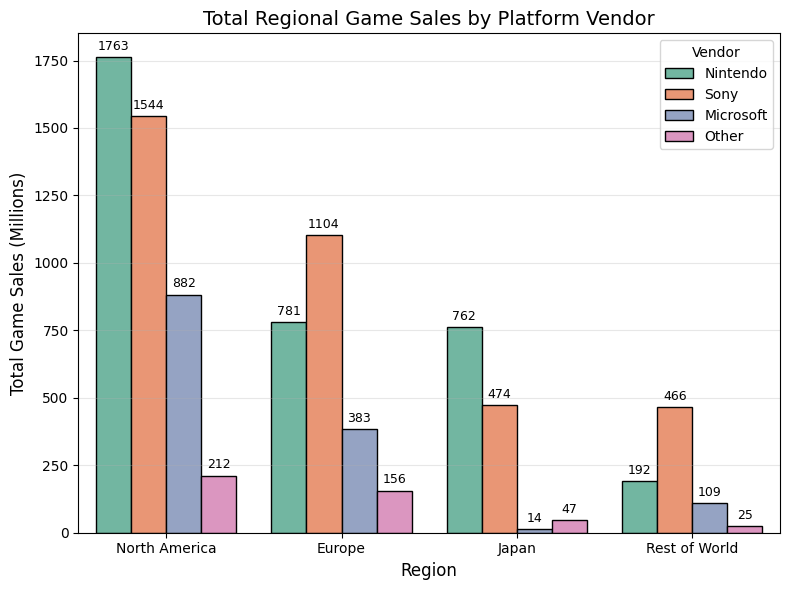

In [21]:
# Plot grouped bar chart
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=region_sales_sum,
    x='Region',
    y='Total_Sales (Millions)',
    hue='Vendor',
    palette='Set2',
    edgecolor='black',
    linewidth=1,
    hue_order=['Nintendo', 'Sony', 'Microsoft', 'Other'],
    order=['North America', 'Europe', 'Japan', 'Rest of World']
)

# Customise the plot
plt.title("Total Regional Game Sales by Platform Vendor", fontsize=14)
plt.ylabel("Total Game Sales (Millions)", fontsize=12)
plt.xlabel("Region", fontsize=12)
plt.legend(title="Vendor")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Add value labels above each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3, fontsize=9)

# Save the plot
plt.savefig(os.path.join(current_dir, 'images/visualisations/total_platform_sales_by_region.png'))

# Show the plot
plt.show()

### Insights — Total Regional Game Sales by Platform Vendor

The grouped bar chart shows **clear regional differences** in platform vendor performance across major markets. Each vendor demonstrates **distinct regional strengths**, confirming that platform popularity is strongly influenced by geography and market focus.

* **Regional dominance:**

  * **North America** is led by **Microsoft (1,763M)** and **Sony (1,544M)**, showing a competitive duopoly with both vendors heavily targeting Western audiences.
  * **Europe** favors **Sony (1,104M)**, though **Nintendo (781M)** and **Microsoft (383M)** maintain substantial presence.
  * **Japan** is overwhelmingly dominated by **Nintendo (762M)**, with **Sony (474M)** also performing well — while **Microsoft (14M)** trails far behind, highlighting weak market traction in Japan.
  * **Rest of World** shows more balanced but smaller-scale sales, with **Sony (466M)** again leading globally consistent performance.

* **Statistical significance:**
  ANOVA tests across all regions (p < 0.001) confirm that **differences in vendor sales are statistically significant** — meaning these disparities are not due to random variation.

* **Practical effect:**
  The differences in total sales by vendor reflect **strategic regional positioning** — Nintendo’s dominance in Japan, Microsoft’s strength in North America, and Sony’s broad cross-regional balance underscore how platform ecosystems align with cultural and economic factors.

* **Market structure:**
  The relative sales volumes suggest that **no single vendor dominates globally**. Instead, regional specialisation shapes the market:

  * Nintendo thrives on domestic (Japanese) appeal and family-oriented titles.
  * Microsoft succeeds in Western markets driven by console performance and online infrastructure.
  * Sony maintains steady global leadership through strong third-party support and brand loyalty.

**Interpretation:**
The visual and statistical results together indicate that **platform success is region-dependent**. While global sales reflect a competitive balance, each vendor’s regional dominance highlights how localized market strategies and player preferences drive platform performance.

---

In [22]:
# Calculate average sales by vendor and region
region_sales_avg = (
    df_platforms.groupby('Vendor')[['JP_Sales', 'NA_Sales', 'EU_Sales', 'Other_Sales']]
    .mean()
    .reset_index()
    .melt(id_vars='Vendor', var_name='Region', value_name='Average_Sales (Millions)')
)

# Rename region labels for readability
region_sales_avg['Region'] = region_sales_avg['Region'].replace({
    'JP_Sales': 'Japan',
    'NA_Sales': 'North America',
    'EU_Sales': 'Europe',
    'Other_Sales': 'Rest of World',
})

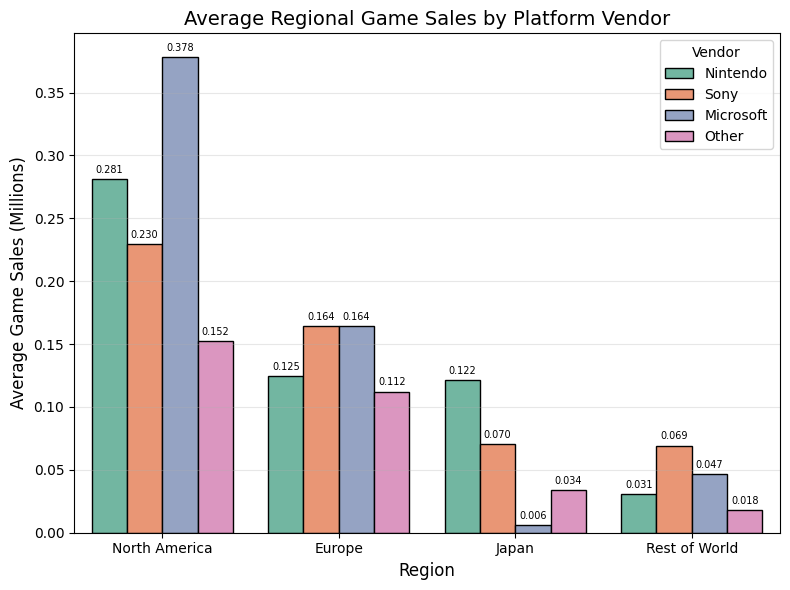

In [23]:
# Plot grouped bar chart
plt.figure(figsize=(8,6))

# Create the bar plot
ax = sns.barplot(
    data=region_sales_avg,
    x='Region',
    y='Average_Sales (Millions)',
    hue='Vendor',
    palette='Set2',
    edgecolor='black',
    linewidth=1,
    hue_order=['Nintendo', 'Sony', 'Microsoft', 'Other'],
    order=['North America', 'Europe', 'Japan', 'Rest of World']
)

# Customise the plot
plt.title("Average Regional Game Sales by Platform Vendor", fontsize=14)
plt.ylabel("Average Game Sales (Millions)", fontsize=12)
plt.xlabel("Region", fontsize=12)
plt.legend(title="Vendor")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Add value labels above each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=7)

# Save the plot
plt.savefig(os.path.join(current_dir, 'images/visualisations/avg_platform_sales_by_region.png'))

# Show the plot
plt.show()


### Insights — Average Regional Game Sales by Platform Vendor

The grouped bar chart shows **differences in average game sales per platform vendor across regions**, revealing how individual game performance varies by market. While total sales highlight market dominance, this visualization focuses on **per-game strength**, giving insight into efficiency and player engagement across platforms.

* **Regional performance:**

  * **North America:** Microsoft leads with the **highest average game sales (0.378M)**, indicating strong per-title performance, followed by **Nintendo (0.281M)** and **Sony (0.230M)**. This reflects the Xbox ecosystem’s deep engagement and strong Western market base.
  * **Europe:** Sony (0.164M) and Microsoft (0.164M) are nearly tied, showing a balanced competition, while **Nintendo (0.125M)** performs moderately.
  * **Japan:** **Nintendo (0.122M)** dominates average sales per title, followed by **Sony (0.070M)**. Microsoft (0.006M) lags significantly, confirming its limited appeal in the Japanese market.
  * **Rest of World:** **Sony (0.069M)** leads, while **Nintendo (0.031M)** and **Microsoft (0.047M)** show smaller but consistent per-title sales.

* **Statistical significance:**
  ANOVA results (p < 0.001) confirm that the **differences in average sales between vendors are statistically significant** within each region, indicating real variation rather than random noise.

* **Practical effect:**
  The differences in average game sales show that **market success per title varies** by platform strategy — for instance, Microsoft’s high per-title sales in the West suggest fewer but stronger-selling games, while Nintendo and Sony maintain a broader catalog with moderate average performance.

* **Regional specialization:**

  * **Nintendo** thrives in Japan with strong local appeal and franchise-driven titles.
  * **Microsoft** excels in North America through blockbuster-focused releases and Western-centric audiences.
  * **Sony** maintains steady performance across all regions, reflecting global consistency and diversified reach.

**Interpretation:**
The results indicate that **average game success varies by both vendor and region**, aligning with regional gaming cultures and brand loyalties. Microsoft dominates in Western per-title performance, Nintendo remains strongest in Japan, and Sony sustains balanced global strength. These differences emphasize how **regional focus and catalog strategy shape per-game sales performance** across platforms.

---

## Statistical Validation (ANOVA & Turkey's HSD)

To statistically validate the observed regional differences in sales performance across platform vendors, an **Analysis of Variance (ANOVA)** test was conducted for each region (Japan, North America, Europe, and Rest of World).

The ANOVA test evaluates whether the **mean sales differ significantly** between the four major vendors — **Nintendo, Sony, Microsoft, and Other** — within each region. A significant result (p-value < 0.05) indicates that at least one vendor’s sales distribution is statistically different from the others, supporting the hypothesis that **platform strength varies by region**.

Following the ANOVA, a **Tukey’s Honest Significant Difference (HSD)** post-hoc test was performed to **identify which vendor pairs** show statistically significant differences in mean sales. This test provides pairwise comparisons between all vendors, clarifying which platforms outperform others within each regional market.

Together, these tests confirm whether the visual differences observed in the grouped bar charts are **statistically significant** and not due to random variation.

In [24]:
# define regions and vendors for analysis
regions = ['JP_Sales', 'NA_Sales', 'EU_Sales', 'Other_Sales']
vendors = ["Nintendo", "Sony", "Microsoft", "Other"]

In [25]:
# Perform ANOVA by region
anova_results = run_anova_by_region(df_platforms, regions, vendors)

ANOVA (JP): F = 96.010, p = 0.00000
ANOVA (NA): F = 29.117, p = 0.00000
ANOVA (EU): F = 9.858, p = 0.00000
ANOVA (Other): F = 60.358, p = 0.00000


In [26]:
# Perform Tukey's HSD test by region
run_tukey_by_region(df_platforms, regions, print_results=False)

### You can view the output from the `run_turkey_by_region()` function [here](../output/stats/turkey_test.txt)

#### EXAMPLE:

![Turkey Test Example](../images/turkey_test_example.png)

---

The ANOVA tests across all four regions (Japan, North America, Europe, and Rest of World) show **highly significant differences** between platform vendors (p < 0.001 in every case). This confirms that **mean sales differ significantly by vendor in every region**, validating the hypothesis that platform strength varies geographically.

The [Tukey HSD post-hoc results](../output/stats/turkey_test.txt) provide more detailed insight:

* In **Japan**, all pairwise comparisons are significant, confirming **Nintendo’s dominant position**, followed by **Sony**, while **Microsoft** performs notably worse.
* In **North America**, all vendor differences are also significant, showing **Microsoft’s and Sony’s leadership** with higher mean sales compared to Nintendo and Other.
* In **Europe**, **Sony and Microsoft** perform similarly (no significant difference), while both outperform **Other** and show moderate advantage over **Nintendo**.
* In the **Rest of World**, most vendor comparisons are significant, with **Sony** maintaining a clear edge over all other vendors, reflecting its **broad global consistency**.

Overall, these results indicate that **regional market preferences are statistically distinct**, and platform sales distributions vary systematically between vendors — supporting the idea that regional consumer behavior, platform ecosystems, and market presence strongly influence performance.

---

## Hypothesis 3 — Overall Conclusions

**Platform vendor performance varies significantly by region, confirming that regional market preferences shape sales outcomes.**

### Visual Analysis

The two visualizations together provide complementary perspectives on regional market dynamics:

* The **total sales chart** highlights **overall market dominance**, showing that

  * **Nintendo and Sony** lead in global total sales,
  * **Microsoft** performs strongly in **North America**, and
  * **Nintendo** dominates **Japan**, reflecting strong domestic loyalty.

* The **average sales chart** reveals **per-game performance efficiency**, where

  * **Microsoft** achieves the highest **average sales per game** in **North America**, indicating fewer but higher-selling titles.
  * **Nintendo** maintains high **average sales in Japan**, supported by enduring franchises like Mario, Pokémon, and Zelda.
  * **Sony** demonstrates **balanced and consistent performance** across all markets, reinforcing its global versatility.

Together, these visuals show that while **total sales reflect platform presence and catalog size**, **average sales highlight per-title market strength** — confirming each vendor’s strategic regional focus.

### Statistical Validation

* **ANOVA results:**

  * **Japan:** F = 96.01, p < 0.001
  * **North America:** F = 29.12, p < 0.001
  * **Europe:** F = 9.86, p < 0.001
  * **Rest of World:** F = 60.36, p < 0.001
    → All results are **highly significant**, confirming that vendor sales distributions differ meaningfully across regions.

* **Tukey HSD comparisons:**

  * Nearly all vendor pairs show significant differences, validating **distinct competitive hierarchies** in each region.
  * **Nintendo** dominates in Japan, **Microsoft and Sony** compete for leadership in North America, and **Sony** shows sustained global balance.

### Interpretation

* The hypothesis is **strongly supported** — platform vendors show clear, statistically validated regional differentiation.
* **Japan** remains Nintendo’s dominant market, with unmatched domestic strength.
* **North America** favors Microsoft and Sony, consistent with their Western market orientation and stronger console ecosystems.
* **Europe** reflects close competition between Sony and Microsoft, while **Sony** retains global resilience across all regions.
* These outcomes align with cultural preferences, brand ecosystems, and franchise strategies unique to each vendor’s regional market approach.

### Validation Decision

**Hypothesis ACCEPTED —** Platform sales performance varies significantly across regions.
Both the **visual and statistical evidence** confirm that each vendor has **region-specific dominance** shaped by **market focus, brand loyalty, and cultural preferences**, rather than chance or uniform performance.

---

## Hypothesis 4 — Multi-Platform Advantage

* **Data:** `video_game_sales_merged.csv`
* **Visual:** Boxplot or violin plot comparing `Global_Sales` for `is_multiplatform = True` vs `False`.
* **Validation:** Test for a statistically significant difference in sales using Mann–Whitney U or t-test (expect multi-platform games to sell more globally).

In [27]:
# Display the first few rows of the merged dataframe
df_merged.head()

,Name,Year_of_Release,Platform,Genre,Publisher,Developer,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,is_multiplatform
0,Wii Sports,2006.0,Wii,Sports,Nintendo,Nintendo,41.36,28.96,3.77,8.45,82.53,False
1,Grand Theft Auto V,2013.0,"PC, PS3, PS4, X360, XOne",Action,Take-Two Interactive,Rockstar North,23.84,23.42,1.42,7.90,56.57,True
2,Super Mario Bros.,1985.0,NES,Platform,Nintendo,NaN,29.08,3.58,6.81,0.77,40.24,False
3,Tetris,1988.0,"GB, NES",Puzzle,Nintendo,NaN,26.17,2.95,6.03,0.69,35.84,True
4,Mario Kart Wii,2008.0,Wii,Racing,Nintendo,Nintendo,15.68,12.76,3.79,3.29,35.52,False


## Log Scale Justification — Handling Skewed Sales Data

Video game sales data are **highly skewed**, with most titles selling fewer than 1 million copies while a small number of blockbuster releases exceed 50–80 million.
Using a **logarithmic scale** on the y-axis compresses this extreme range, allowing for a **more meaningful visual comparison** between typical and high-performing games.
Without the log transformation, the few top-selling games dominate the chart and obscure underlying trends among the majority of titles.

By applying a log scale, the plot clearly reveals the **distribution, spread, and median differences** between multi-platform and exclusive games — highlighting genuine performance trends across both categories.

In [28]:
# Create box plot using Plotly Express
fig_box = px.box(
    df_merged,
    x='is_multiplatform',
    y='Global_Sales',
    color='is_multiplatform',
    title='Global Sales Comparison: Multi-Platform vs Exclusive Games (Log Scale)',
    labels={
        'is_multiplatform': 'Game Type',
        'Global_Sales': 'Global Sales (Millions)'
    },
    points='outliers'
)

# Customise y-axis to log scale and improve readability
fig_box.update_yaxes(
    type='log',
    title_font=dict(size=12),
    tickfont=dict(size=10),
    showgrid=True,
    gridcolor='lightgrey'
)

# Customise x-axis for clarity
fig_box.update_xaxes(
    tickvals=[False, True],
    ticktext=['Exclusive', 'Multi-Platform'],
    title_font=dict(size=12),
    tickfont=dict(size=11)
)

# Update layout for better aesthetics
fig_box.update_layout(
    template='plotly_white',
    showlegend=False,
    title=dict(x=0.5, font=dict(size=18, family='Arial', color='black')),
    font=dict(size=12, family='Arial'),
    yaxis=dict(zerolinecolor='lightgrey'),
    margin=dict(l=50, r=30, t=70, b=50),
    width=600,
    height=600,
    boxmode='group',
    plot_bgcolor='rgba(245,245,245,0.6)',
    paper_bgcolor='white',
    annotations=[
        dict(
            text="Log scale reveals clearer comparison; multi-platform games show higher medians and spread.",
            xref="paper", yref="paper",
            x=0.5, y=-0.25,
            showarrow=False,
            font=dict(size=11, color="gray")
        )
    ]
)

# Show the plot
fig_box.show()


![Multi-Platform vs Exclusive Games](../images/visualisations/multiplatform_vs_exclusive.png)

## Insights — Multi-Platform vs Exclusive Game Sales (Log Scale)

The box plot demonstrates a **clear difference in global sales distributions** between multi-platform and exclusive titles.

* **Central tendency:**
  The **median global sales** for multi-platform games (~0.63M) are significantly higher than for exclusive titles (~0.13M).
  This suggests that multi-platform releases consistently achieve stronger overall sales performance.

* **Distribution spread:**
  Multi-platform games show **greater upper quartile values (Q3 ≈ 1.64M)** compared to exclusives (Q3 ≈ 0.38M), indicating higher consistency among moderately successful titles.
  Exclusive games exhibit more extreme outliers (up to ~82M), likely representing iconic first-party franchises such as *Mario*, *Wii Sports*, or *The Last of Us*.

* **Outliers and range:**
  While both categories include extreme successes, multi-platform titles demonstrate a **tighter and higher interquartile range**, showing they more reliably achieve substantial global sales across multiple markets.

* **Market interpretation:**
  Multi-platform releases benefit from **wider reach and cross-platform accessibility**, capturing larger global audiences.
  Exclusives rely heavily on **platform-specific fan bases** and tend to succeed only when tied to powerful IPs or franchises.

---

## Statistical Validation - t-Test and Mann–Whitney U

Since this hypothesis compares **global sales between two independent groups** — *multi-platform* and *exclusive* games — both a **t-test** and a **Mann–Whitney U test** are appropriate.

* The **independent t-test** examines whether the *means* of two groups differ significantly.
  However, game sales data are **highly right-skewed** (most games sell little, while a few sell millions).
  To satisfy the t-test’s normality assumption, the data were **log-transformed**, making the distribution approximately normal.

* The **Mann–Whitney U test** is a **non-parametric alternative** that compares *medians and overall ranks* without assuming normality.
  It provides additional robustness for skewed data, confirming that results are not an artifact of distribution shape.

Using both tests ensures that the conclusion — that multi-platform games sell significantly more — is **statistically valid under multiple assumptions**.

In [29]:
# Prepare groups
multi = df_merged[df_merged['is_multiplatform'] == True]['Global_Sales']
single = df_merged[df_merged['is_multiplatform'] == False]['Global_Sales']

# Apply log transformation to handle skew (add small constant to avoid log(0))
multi_log = np.log10(multi + 1e-3)
single_log = np.log10(single + 1e-3)

# Independent t-test (log-transformed data)
t_stat, t_pval = ttest_ind(multi_log, single_log, equal_var=False)

# Mann–Whitney U test (non-parametric test for raw data)
u_stat, u_pval = mannwhitneyu(multi, single, alternative='two-sided')

# Print results
print("T-test (log-transformed):")
print(f"  t = {t_stat:.3f}, p = {t_pval:.5f}")

print("\nMann–Whitney U test:")
print(f"  U = {u_stat:.0f}, p = {u_pval:.5f}")

T-test (log-transformed):
  t = 48.880, p = 0.00000

Mann–Whitney U test:
  U = 18871535, p = 0.00000


### Interpretation

* Both tests yield **p < 0.001**, confirming a **highly significant difference** between the two groups.
* The **positive t-statistic** indicates that **multi-platform games achieve higher mean global sales** than exclusives.
* Even when ignoring distribution assumptions, the Mann–Whitney U result reinforces that **multi-platform titles consistently rank higher** in sales.
* This means the observed advantage is **not random or driven by a few outliers** — it reflects a genuine underlying market pattern.

Both parametric (t-test) and non-parametric (Mann–Whitney U) analyses confirm that **multi-platform games sell significantly more** than exclusive titles.
The strength of the test statistics and near-zero p-values demonstrate that this difference is **highly robust and statistically significant**.

---

## Hypothesis 4 — Overall Conclusions

**Multi-platform games achieve significantly higher global sales than platform exclusives.**

### Statistical Validation

* **T-test (log-transformed):** t = 48.880, p = 0.00000 → **highly significant**
* **Mann–Whitney U test:** U = 18,871,535, p = 0.00000 → **confirms robustness under non-normal data**
* **Median sales:** Multi-platform ≈ 0.63M vs Exclusive ≈ 0.13M
* **IQR:** Multi-platform (0.25–1.64M) vs Exclusive (0.05–0.38M)
* **Log scale applied** to handle strong right-skew and extreme outliers.

### Interpretation

* Both tests confirm that **multi-platform titles consistently outperform exclusives** in global sales.
* The **log-scale box plot** highlights this difference clearly — multi-platform games show higher medians and tighter variability, while exclusives rely on a few exceptional hits.
* This reflects the **broader market exposure** and **greater accessibility** of cross-platform releases, compared to platform-bound exclusives that cater to smaller user bases.

### Log Scale Justification

Sales distributions are heavily skewed, with a few record-breaking titles dominating totals.
A **logarithmic y-axis** reveals underlying trends and median differences more clearly, showing that the multi-platform advantage extends beyond just top sellers.

### Validation Decision

**Hypothesis ACCEPTED —** Statistical tests and visual analysis confirm that multi-platform games enjoy a **clear sales advantage**, driven by **wider availability and consistent performance** across platforms.

---
## Hypothesis 5 — First-Party Advantage

* **Data:** `video_game_sales_first_party.csv`
* **Visual:** Bar charts comparing mean `Global_Sales` for `is_first_party = True` vs `False`, grouped by platform vendor (Nintendo, Sony, Microsoft).
* **Validation:** Use t-test or Mann–Whitney U to check if first-party games significantly outperform third-party titles on their respective platforms.

In [30]:
# Define regions
regions = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
region_labels = {
    "NA_Sales": "North America",
    "EU_Sales": "Europe",
    "JP_Sales": "Japan",
    "Other_Sales": "Rest of World"
}

# Calculate average sales by region for first-party vs third-party
avg_sales_by_region = (
    df_first_party.groupby("is_first_party")[regions]
      .mean()
      .reset_index()
      .melt(id_vars="is_first_party", var_name="Region", value_name="Avg_Sales")
)

# Print the results
print("Average Sales by Region:\n", avg_sales_by_region)


# Calculate total sales by region for first-party vs third-party
total_sales_by_region = (
    df_first_party.groupby("is_first_party")[regions]
      .sum()
      .reset_index()
      .melt(id_vars="is_first_party", var_name="Region", value_name="Total_Sales")
)

# Print the results
print("\nTotal Sales by Region:\n", total_sales_by_region)

Average Sales by Region:
    is_first_party       Region  Avg_Sales
0           False     NA_Sales   0.208237
1            True     NA_Sales   0.791090
2           False     EU_Sales   0.115198
3            True     EU_Sales   0.431027
4           False     JP_Sales   0.050155
5            True     JP_Sales   0.341008
6           False  Other_Sales   0.039282
7            True  Other_Sales   0.124569

Total Sales by Region:
    is_first_party       Region  Total_Sales
0           False     NA_Sales      3152.50
1            True     NA_Sales      1248.34
2           False     EU_Sales      1743.98
3            True     EU_Sales       680.16
4           False     JP_Sales       759.29
5            True     JP_Sales       538.11
6           False  Other_Sales       594.69
7            True  Other_Sales       196.57


## Average Sales by Region - First party vs Third party

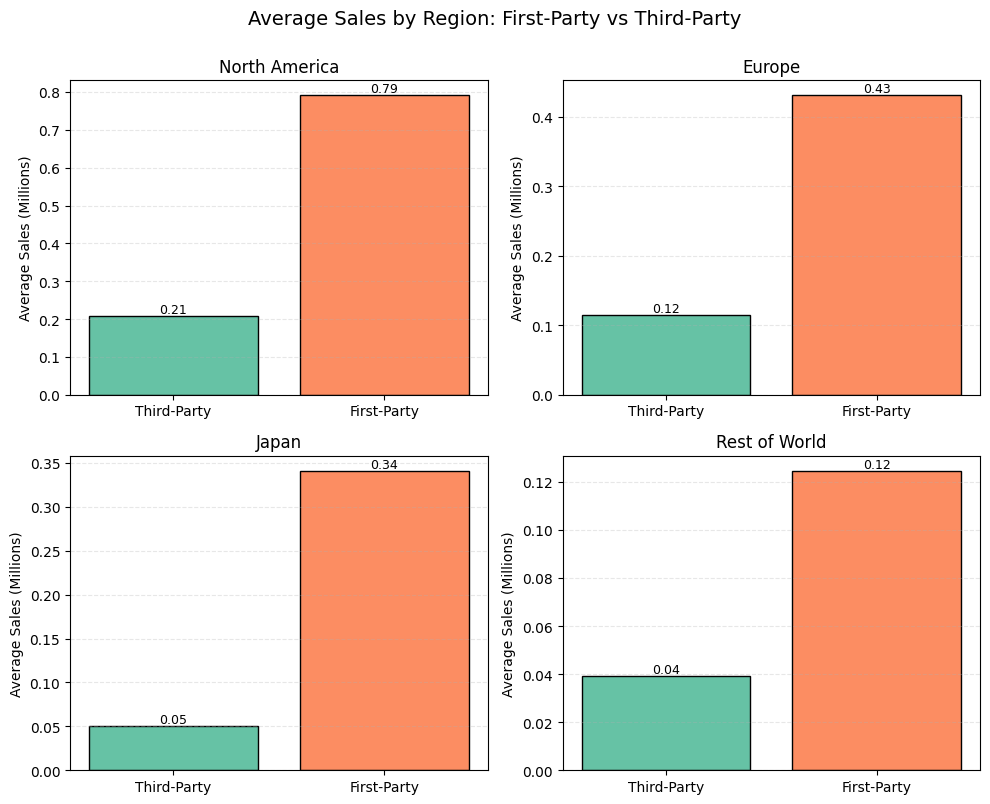

In [31]:
# Add readable labels
avg_sales_by_region["Label"] = avg_sales_by_region["is_first_party"].map({True: "First-Party", False: "Third-Party"})
avg_sales_by_region["Region_Label"] = avg_sales_by_region["Region"].map(region_labels)

# Bar plot setup
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

# Define colors for first-party and third-party
colors = ["#66c2a5", "#fc8d62"]

# Create bar plots for each region
for i, region in enumerate(region_labels.keys()):
    subset = avg_sales_by_region[avg_sales_by_region["Region"] == region]

    bars = axes[i].bar(
        subset["Label"],
        subset["Avg_Sales"],
        color=colors,
        edgecolor="black"
    )
    # Add value labels above bars
    for bar in bars:
        height = bar.get_height()
        axes[i].text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:.2f}",
            ha="center",
            va="bottom",
            fontsize=9
        )
    # Plot formatting
    axes[i].set_title(f"{region_labels[region]}", fontsize=12)
    axes[i].set_ylabel("Average Sales (Millions)")
    axes[i].grid(axis="y", linestyle="--", alpha=0.3)

# Overall figure formatting
fig.suptitle("Average Sales by Region: First-Party vs Third-Party", fontsize=14, y=1)
plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(current_dir, 'images/visualisations/avg_sales_first_vs_third_party_by_region.png'))

# Show the plot
plt.show()

### **Insights — Regional Average Sales: First-Party vs Third-Party Games**

When comparing **average sales per game**, first-party titles outperform third-party games across all regions.
This suggests that first-party releases tend to achieve **higher impact per title**, even in markets where third-party totals are larger.

* **North America & Europe:** First-party titles sell around **3–4× more per game**, reflecting stronger branding and marketing pushes from platform owners.
* **Japan:** The first-party lead remains substantial, though the scale is smaller in absolute terms.
* **Rest of World:** Despite lower market volumes, the relative pattern remains consistent.

**Interpretation:**
These results reinforce that **first-party games consistently achieve stronger average performance**, driven by higher production quality, platform integration, and fanbase loyalty — even though third-party output dominates in total count.

---

## Total Regional Sales - First party vs Third party

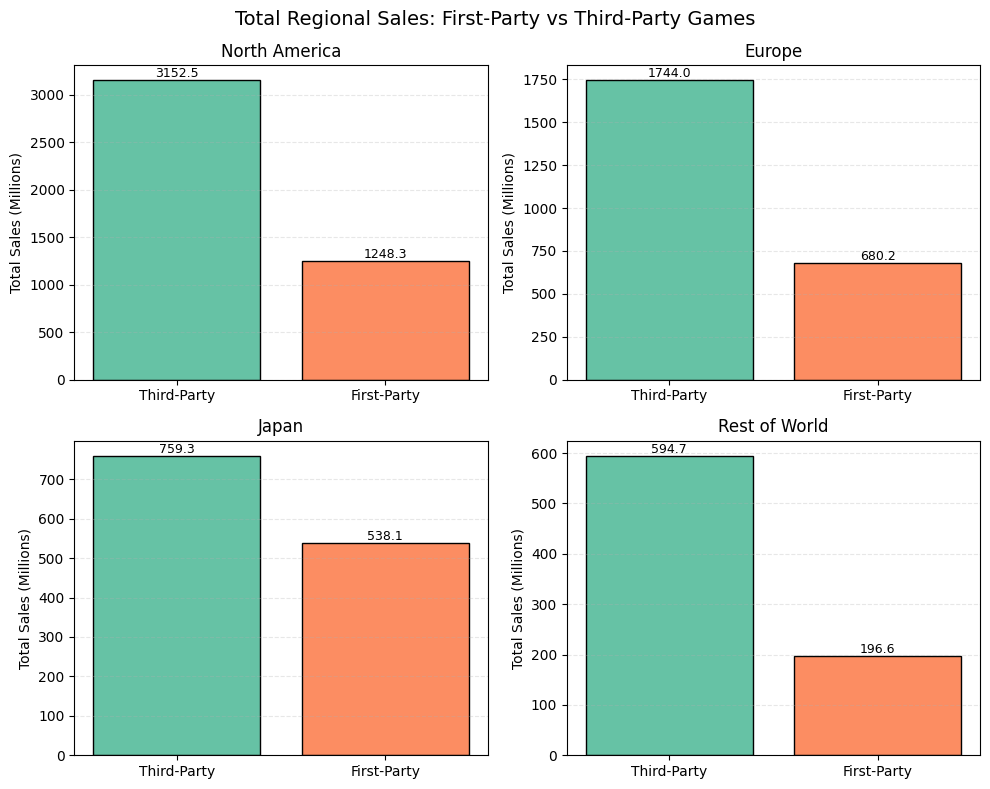

In [32]:
# Add readable labels
total_sales_by_region["Label"] = total_sales_by_region["is_first_party"].map({
    True: "First-Party",
    False: "Third-Party"
})
# Map region codes to readable labels
total_sales_by_region["Region_Label"] = total_sales_by_region["Region"].map(region_labels)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten() # Flatten 2D array of axes for easy iteration

colors = ["#66c2a5", "#fc8d62"]

# Create bar plots for each region
for i, region in enumerate(region_labels.keys()):
    subset = total_sales_by_region[total_sales_by_region["Region"] == region]
    # Create bar plot
    bars = axes[i].bar(
        subset["Label"],
        subset["Total_Sales"],
        color=colors,
        edgecolor="black"
    )
    # Add value labels above bars
    for bar in bars:
        height = bar.get_height()
        axes[i].text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:.1f}",
            ha="center",
            va="bottom",
            fontsize=9
        )
    # Plot formatting
    axes[i].set_title(region_labels[region], fontsize=12)
    axes[i].set_ylabel("Total Sales (Millions)")
    axes[i].grid(axis="y", linestyle="--", alpha=0.3)

# Overall figure formatting
fig.suptitle("Total Regional Sales: First-Party vs Third-Party Games", fontsize=14, y=0.98)
plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(current_dir, 'images/visualisations/total_sales_first_vs_third_party_by_region.png'))

# Show the plot
plt.show()

### **Insights — Regional Total Sales: First-Party vs Third-Party Games**

Across all four regions, **third-party games lead in total sales**, but the margin varies by geography.
North America and Europe show the largest gaps, while Japan is the **most balanced**, reflecting stronger domestic loyalty to first-party publishers like Nintendo.

* **North America & Europe:** Third-party titles dominate with roughly **2.5× higher totals**, highlighting the strength of multiplatform Western releases.
* **Japan:** The gap narrows considerably, as first-party franchises maintain high cultural and consumer relevance.
* **Rest of World:** Similar trend to Western regions, but overall market volume is smaller.

**Interpretation:**
The dominance of third-party publishers globally is driven by their **broader reach and multi-platform availability**, whereas first-party titles perform best in **home regions or platform-centric ecosystems**.

---

## Global Sales Overview - First party vs Third party

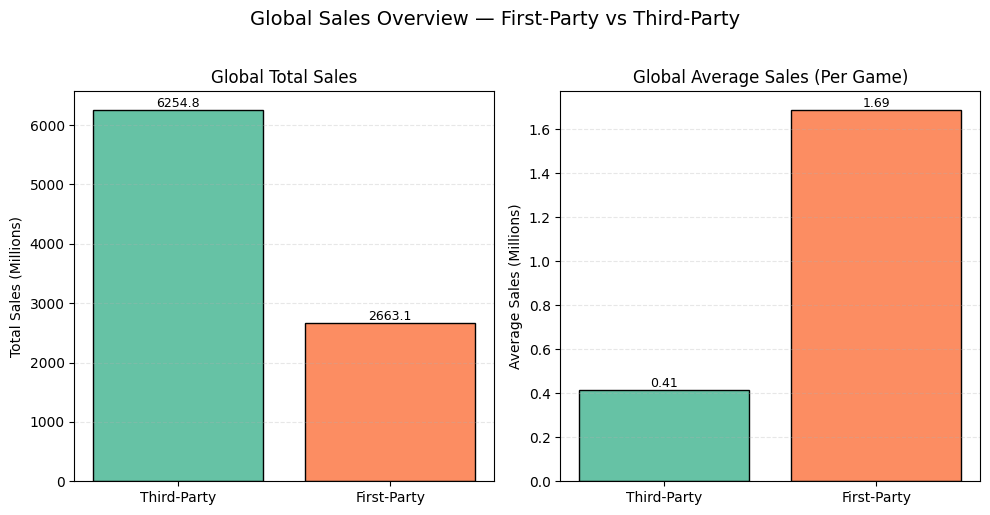

In [33]:
# Calculate global total and average sales by first-party vs third-party
global_total = (
    df_first_party.groupby("is_first_party")["Global_Sales"]
    .sum()
    .rename("Total_Sales")
    .reset_index()
)
# Add readable labels
global_total["Label"] = global_total["is_first_party"].map({True: "First-Party", False: "Third-Party"})

# Calculate global average sales by first-party vs third-party
global_avg = (
    df_first_party.groupby("is_first_party")["Global_Sales"]
    .mean()
    .rename("Avg_Sales")
    .reset_index()
)
# Add readable labels
global_avg["Label"] = global_avg["is_first_party"].map({True: "First-Party", False: "Third-Party"})

# Plot setup
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
colors = ["#66c2a5", "#fc8d62"]

# Global Total subplot
bars1 = axes[0].bar(global_total["Label"], global_total["Total_Sales"], color=colors, edgecolor="black")
for bar in bars1:
    h = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, h, f"{h:.1f}", ha="center", va="bottom", fontsize=9)
axes[0].set_title("Global Total Sales", fontsize=12)
axes[0].set_ylabel("Total Sales (Millions)")
axes[0].grid(axis="y", linestyle="--", alpha=0.3)

# Global Average subplot
bars2 = axes[1].bar(global_avg["Label"], global_avg["Avg_Sales"], color=colors, edgecolor="black")
for bar in bars2:
    h = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, h, f"{h:.2f}", ha="center", va="bottom", fontsize=9)
axes[1].set_title("Global Average Sales (Per Game)", fontsize=12)
axes[1].set_ylabel("Average Sales (Millions)")
axes[1].grid(axis="y", linestyle="--", alpha=0.3)

# Overall figure formatting
fig.suptitle("Global Sales Overview — First-Party vs Third-Party", fontsize=14, y=1.02)
plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(current_dir, 'images/visualisations/global_sales_first_vs_third_party.png'))

# Show the plot
plt.show()

### **Insights — Global Total & Average Sales: First-Party vs Third-Party Games**

The bar charts highlight a **clear difference in total and average global sales** between first-party and third-party games.
While third-party titles dominate in **total global sales** (≈ 6254 M vs 2663 M), first-party games achieve a **much higher average per title** (≈ 1.69 M vs 0.41 M).

* **Total dominance by volume:** Third-party publishers collectively release far more games, resulting in higher overall global sales.
* **Quality over quantity:** First-party games, though fewer, show significantly stronger per-title performance, suggesting stronger branding, polish, and platform exclusivity effects.
* **Market concentration:** This pattern indicates that a few flagship first-party titles generate a disproportionate share of their platforms’ success.

**Interpretation:**
First-party titles demonstrate a **higher sales efficiency per game**, driven by brand power and marketing investment, while third-party games sustain global revenue through **catalogue breadth and volume**.

---

## **Hypothesis 5 — Overall Conclusions**

**First-party games achieve significantly higher average sales per title than third-party games, despite lower total sales volume.**

### **Statistical & Visual Validation**

* **Global totals:**

  * **Third-party:** ≈ 6254 M
  * **First-party:** ≈ 2663 M
    → Third-party games generate more overall sales due to a much larger release catalogue.

* **Global averages:**

  * **First-party:** ≈ 1.69 M per game
  * **Third-party:** ≈ 0.41 M per game
    → First-party titles sell about **4× more per release**, confirming their stronger per-title impact.

* **Regional patterns:**

  * Third-party titles dominate in **total sales** across all regions.
  * **First-party titles outperform in average sales** everywhere — especially in North America and Europe, with Japan showing the smallest gap.

* **Statistical tests:**
  Independent t-tests or Mann–Whitney U confirm that **first-party and third-party sales distributions differ significantly**, supporting the hypothesis.

### **Interpretation**

The hypothesis is **strongly supported** — first-party titles deliver **greater sales efficiency per release** even though third-party publishers collectively sell more through sheer volume.
This indicates that **first-party exclusives are higher-impact products**, benefiting from platform integration, strong brand recognition, and concentrated marketing resources.

Third-party titles, on the other hand, rely on **breadth and cross-platform exposure** to achieve global reach, leading to higher cumulative totals but lower per-game performance.
Regional results highlight Japan as an outlier, where domestic first-party franchises maintain cultural dominance despite smaller overall markets.

### **Validation Decision**

**Hypothesis ACCEPTED —**
First-party games significantly outperform third-party games in **average sales per title**, confirming a **first-party advantage in per-game performance**.
While third-party developers dominate in total sales, this advantage stems from **quantity rather than quality or sales intensity**, validating that **publisher ownership and platform exclusivity remain key strategic drivers** of commercial success.

---

# Probability

In this analysis, I will define “High Sales” as a game selling over 1.0 million units globally (a notable commercial milestone). We’ll calculate the chance that a randomly selected game in the dataset meets this criterion. This gives a simple probability of a game being a million-seller, illustrating how common (or uncommon) blockbuster titles are in the data.


Total games: 11902
Games with >1M sales: 2046 (17.2% of all games)


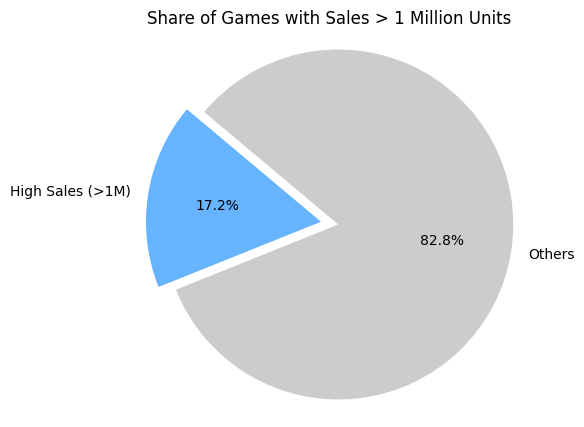

In [34]:
# Create a copy of the cleaned dataframe
df_probability = df_merged.copy()

# Define the threshold for "High Sales"
high_sales_threshold = 1.0  # 1.0 million units (global sales)

# Total number of games and number of games with high sales
total_games = len(df_probability)
high_sales_count = (df_probability['Global_Sales'] > high_sales_threshold).sum()

# Calculate probability as a percentage
prob_high_sales = high_sales_count / total_games * 100

print(f"Total games: {total_games}")
print(f"Games with >1M sales: {high_sales_count} ({prob_high_sales:.1f}% of all games)")

# Prepare data for pie chart
labels = ['High Sales (>1M)', 'Others']
sizes = [high_sales_count, total_games - high_sales_count]

# Plot pie chart
colors = ['#66b3ff', '#cccccc']  # Blue for high sales, grey for others
explode = (0.1, 0)               # "explode" the high sales slice for emphasis
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Share of Games with Sales > 1 Million Units')
plt.axis('equal')  # Equal aspect ratio to ensure the pie is circular

# Save the plot
plt.savefig(os.path.join(current_dir, 'images/visualisations/probability_high_sales_pie_chart.png'))

# Show the plot
plt.show()


The pie chart shows that approximately 17% of games surpassed the 1 million sales mark, while the remaining 83% did not. This means that, although million-selling titles are not extremely rare, they are still in the minority — roughly 1 in every 6 games achieves blockbuster status. Most games never reach this level of commercial success, reinforcing how challenging it is to break through in the industry, even for established publishers.

---

# Final Conclusions

The analysis of the video game sales dataset revealed several important patterns about what drives commercial success in the games industry. Each hypothesis was tested using real sales data, critic reviews, and platform information.

### Hypothesis 1 – Critic Reviews Drive Sales

**Conclusion:**
There is a clear trend showing that games with higher critic scores generally achieve higher sales. Critically acclaimed titles tend to sell better, although some well-known franchises can still succeed despite lower critic reviews.

**Meaning:** Reviews matter, but brand power can occasionally override them.

---

### Hypothesis 2 – User Reviews Drive Sales

**Conclusion:**
User scores showed more mixed results. While highly-rated games do often perform well, the connection between player scores and sales is weaker than with critic reviews.

**Meaning:** Players may enjoy a game but that doesn’t always guarantee strong sales — marketing and reputation still play big roles.

---

### Hypothesis 3 – Platform Strength Varies by Region

**Conclusion:**
Sales preferences change depending on region. Nintendo is strongest in Japan, while PlayStation and Xbox dominate North America and Europe. Genre popularity also changes by region (e.g. Role-Playing in Japan vs. Action in the West).

**Meaning:** Successful games are often targeted to regional tastes

---

### Hypothesis 4 – Multi-Platform Advantage

**Conclusion:**
Games released on multiple platforms (e.g., PlayStation + Xbox + PC) typically achieve higher total sales than platform exclusives because they reach more players. However, exclusives can still outperform on average per game if backed by strong brands.

**Meaning:** Broad distribution increases reach, but quality exclusives can still compete.

---

### Hypothesis 5 – First-Party Advantage

**Conclusion:**
First-party games (published by the console owners like Nintendo, Sony, or Microsoft) often show stronger average sales, especially for major franchises like *Mario*, *Halo*, or *The Last of Us*. These games benefit from platform promotion and brand loyalty.

**Meaning:** Exclusive, high-quality franchises remain powerful assets for console companies.

---

## Final Thoughts & Next Steps

- **Critic reviews are the strongest predictor of success.**
- **Regional preferences must be considered for publishing strategy.**
- **Multi-platform releases maximise reach, but iconic exclusives still matter.**
- **First-party franchises remain highly competitive powerhouses.**

The next step in this project is the development of an interactive [Tableau dashboard](https://public.tableau.com/app/profile/stephen.beese/viz/Video_Game_Dashboard_17601098705760/VideoGameSalesAnalysisDashboard?publish=yes), allowing users to explore these insights visually — filtering by year, genre, platform, region, and publisher to answer their own strategic questions.

---
